In [1]:
from clouddrift import datasets
from clouddrift.analysis import subset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean

In [2]:
# plot parameters
selected_id = 2578
ticks = [0.2, 0.1]
lon = [-53.6, -52.4]
lat = [44.7, 45.2]
title = ["six-hourly", "hourly"]

# download using `clouddrift.datasets` of the selected id
ds_6h = subset(datasets.gdp6h(), {"ID": selected_id}).load()
ds_1h = subset(datasets.gdp1h(), {"ID": selected_id}).load()

# restrict to the subregion
ds = []
for d in [ds_6h, ds_1h]:
    ds.append(subset(d, {"lon": (lon[0], lon[1]), "lat":  (lat[0], lat[1])}))

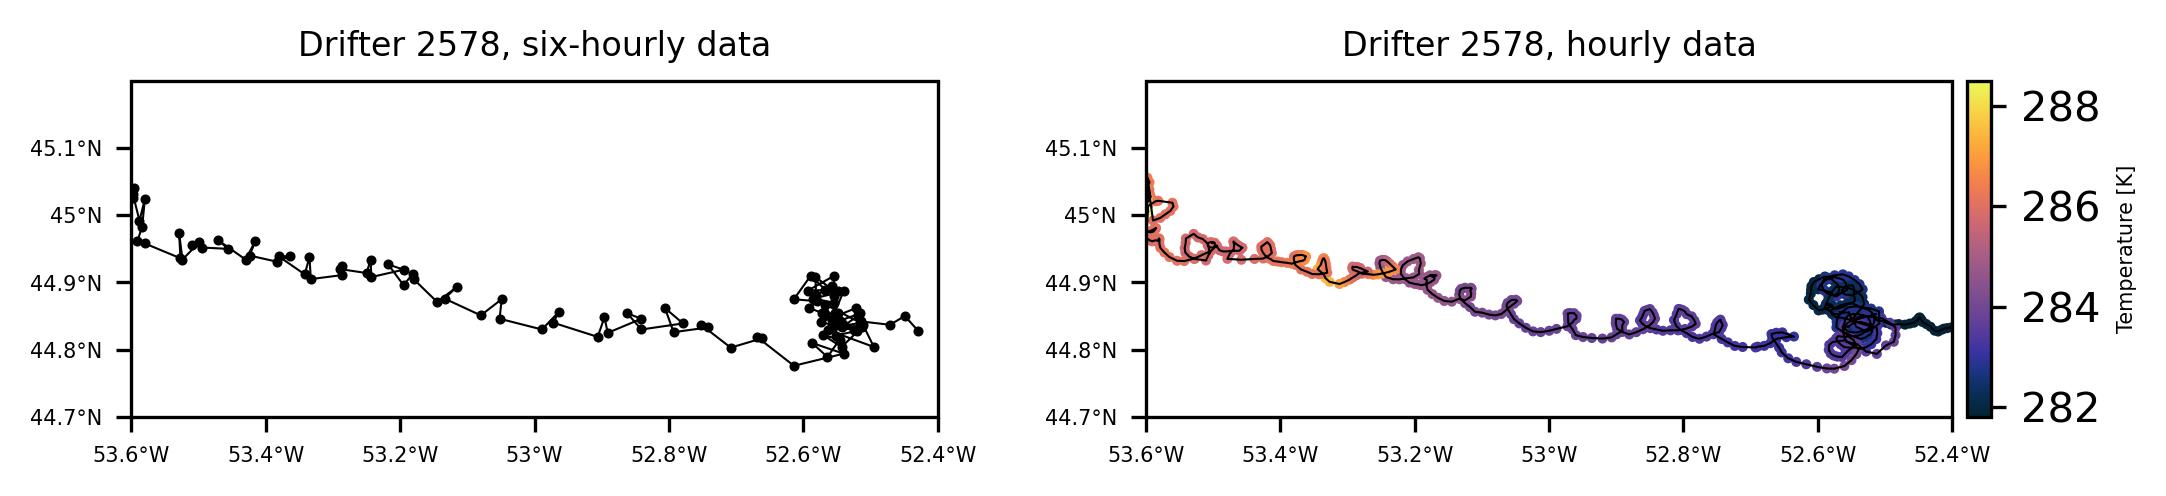

In [3]:
plot_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8,4),dpi=300)
ax1 = fig.add_subplot(1,2,1,projection=plot_crs)
ax2 = fig.add_subplot(1,2,2,projection=plot_crs)

for i, ax in enumerate([ax1, ax2]):
    ax.set_title(f"Drifter {selected_id}, {title[i]} data", fontsize=8)
    ax.plot(ds[i].lon, ds[i].lat, color='k', linewidth=0.5, transform=plot_crs)

    # colorbar axis
    divider1 = make_axes_locatable(ax)
    cax = divider1.append_axes("right", size="3%", pad=0.05, axes_class=plt.Axes)

    if i == 1:
        s = ax.scatter(ds[i].lon, ds[i].lat, c=ds[i].sst, s=2, transform=plot_crs, cmap=cmocean.cm.thermal)
        cb = fig.colorbar(s, cax=cax)
        cb.set_label("Temperature [K]", fontsize=5)
    else:
        s = ax.scatter(ds[i].lon, ds[i].lat, c='k', s=2, transform=plot_crs)
         # hack for subplot to have the same size
        cb = fig.colorbar(s, cax=cax)
        fig.delaxes(fig.axes[2])
        

    ax.set_xticks(np.arange(lon[0], lon[1], ticks[0]), crs=plot_crs)
    ax.set_yticks(np.arange(lat[0], lat[1], ticks[1]), crs=plot_crs)
    ax.tick_params(axis="x", labelsize=5)
    ax.tick_params(axis="y", labelsize=5)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_xlim(lon)
    ax.set_ylim(lat)

#fig.savefig("gdp-hourly.png", format="png", bbox_inches="tight", dpi=300)